In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('sample_data/california_housing_train.csv')

In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

<Axes: xlabel='population', ylabel='households'>

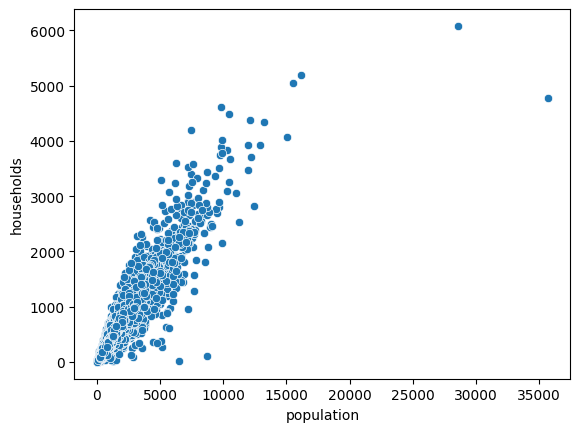

In [25]:
sns.scatterplot(data=df, x="population", y="households")

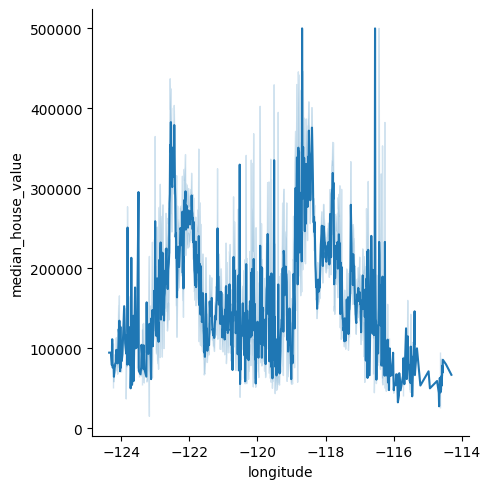

In [34]:
sns.relplot(data=df, x='longitude', y='median_house_value', kind='line')

<Axes: xlabel='housing_median_age', ylabel='Count'>

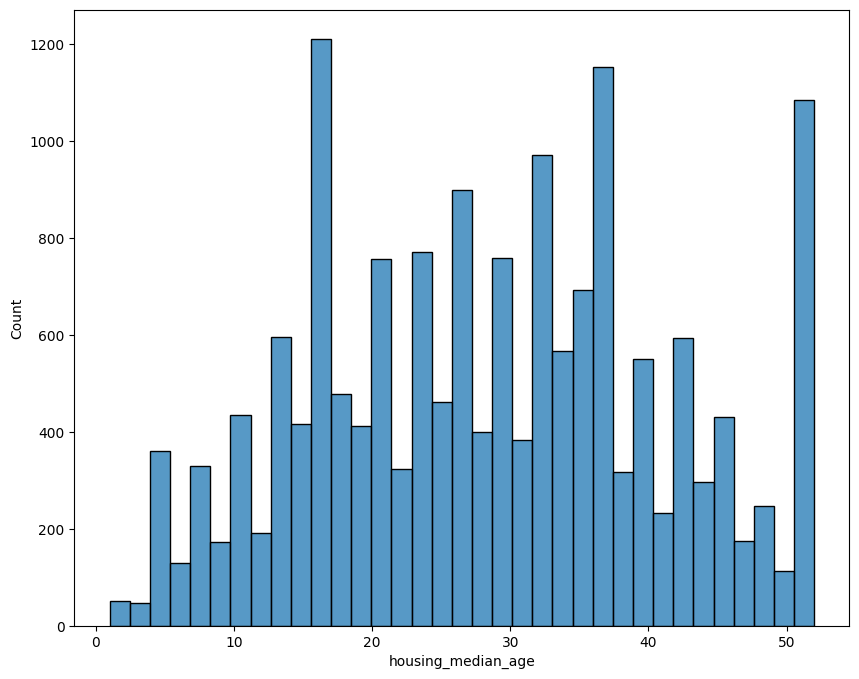

In [35]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='housing_median_age')

In [38]:
pg=sns.load_dataset('penguins')

In [40]:
pg.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [42]:
pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<Axes: xlabel='sex', ylabel='body_mass_g'>

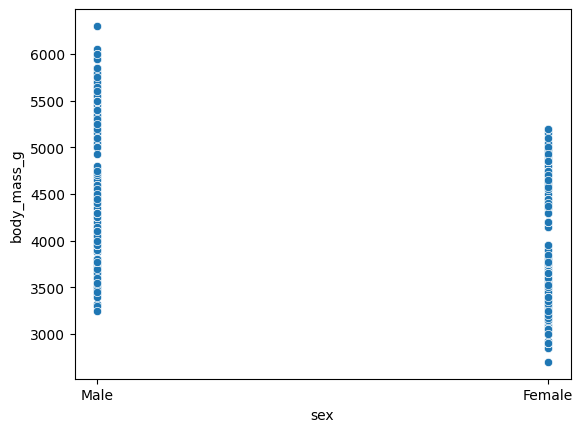

In [44]:
sns.scatterplot(data=pg, y='body_mass_g', x='sex')

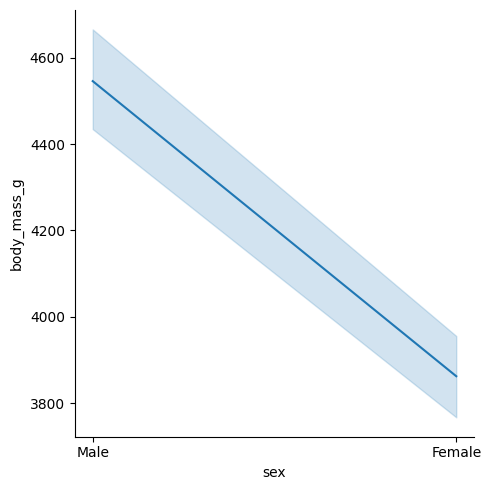

In [48]:
sns.relplot(data=pg, y='body_mass_g', x='sex', kind='line')

<Axes: xlabel='species', ylabel='body_mass_g'>

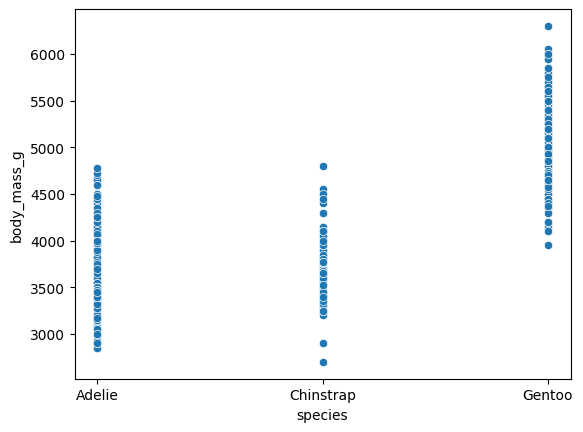

In [50]:
sns.scatterplot(data=pg, y='body_mass_g', x='species')

<Axes: xlabel='species', ylabel='body_mass_g'>

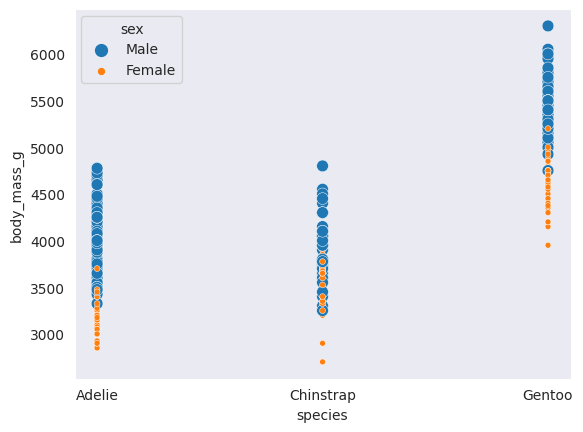

In [83]:
sns.set_style('dark')
sns.scatterplot(data=pg, y='body_mass_g', x='species', hue='sex', size='sex')

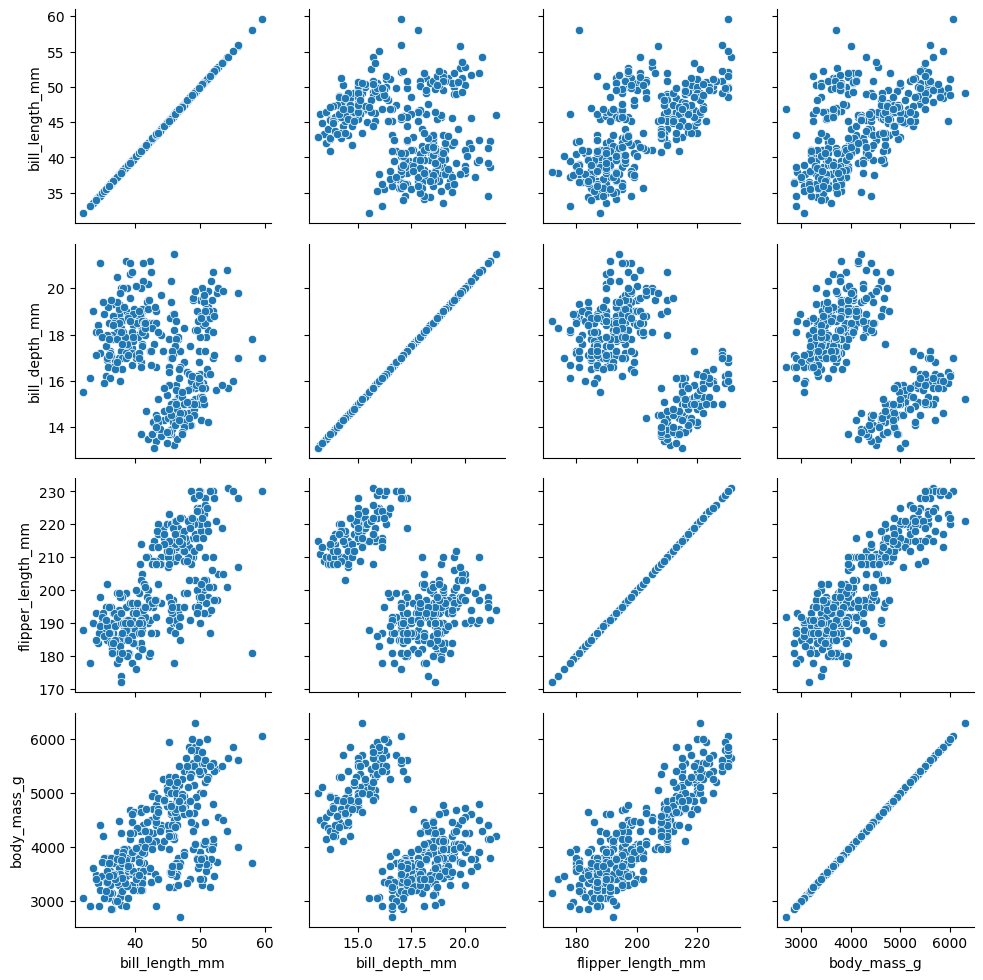

In [57]:
cols = ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
prg = sns.PairGrid(pg[cols])
prg.map(sns.scatterplot)

<Figure size 1000x500 with 0 Axes>

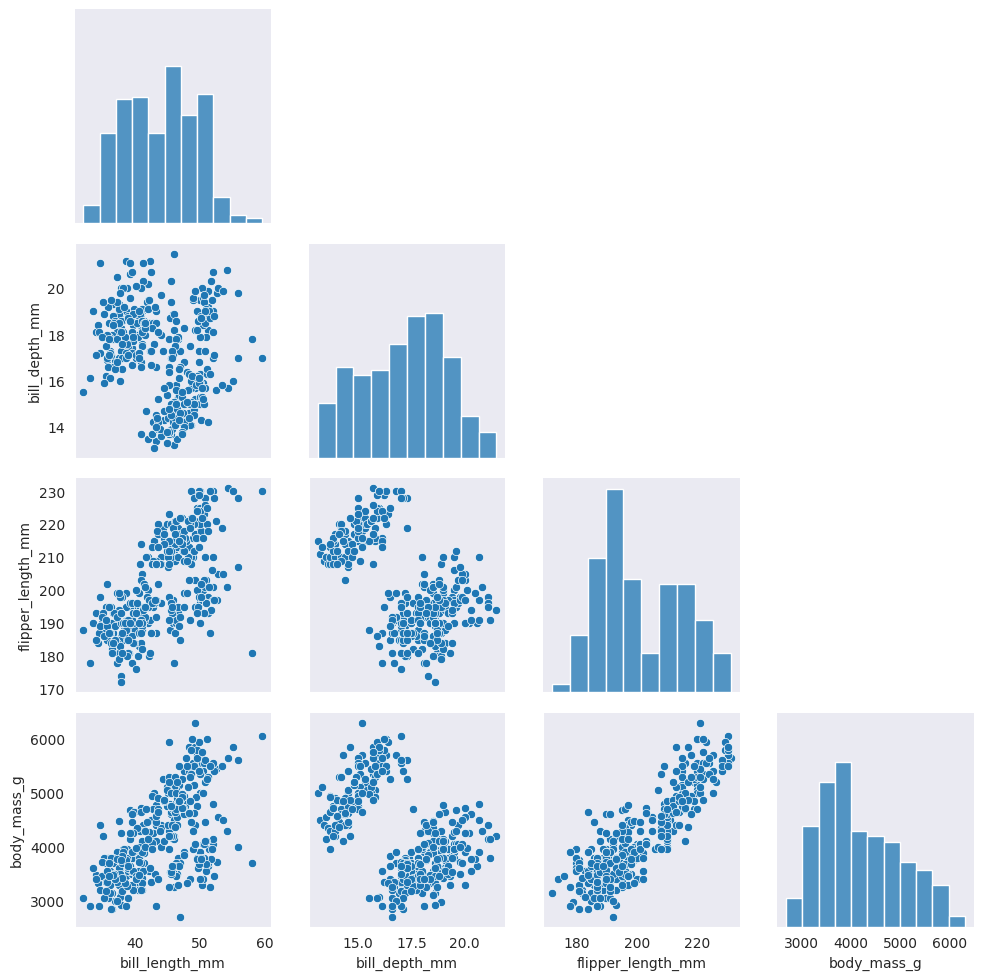

In [87]:
cols = ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
plt.figure(figsize=(10, 5))
prg = sns.PairGrid(pg[cols], corner=True)
# prg.map(sns.scatterplot)

prg.map_diag(sns.histplot)
prg.map_offdiag(sns.scatterplot)

In [89]:
corr = pg.corr()

<ipython-input-89-4cefab0d5d6c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = pg.corr()


<Axes: >

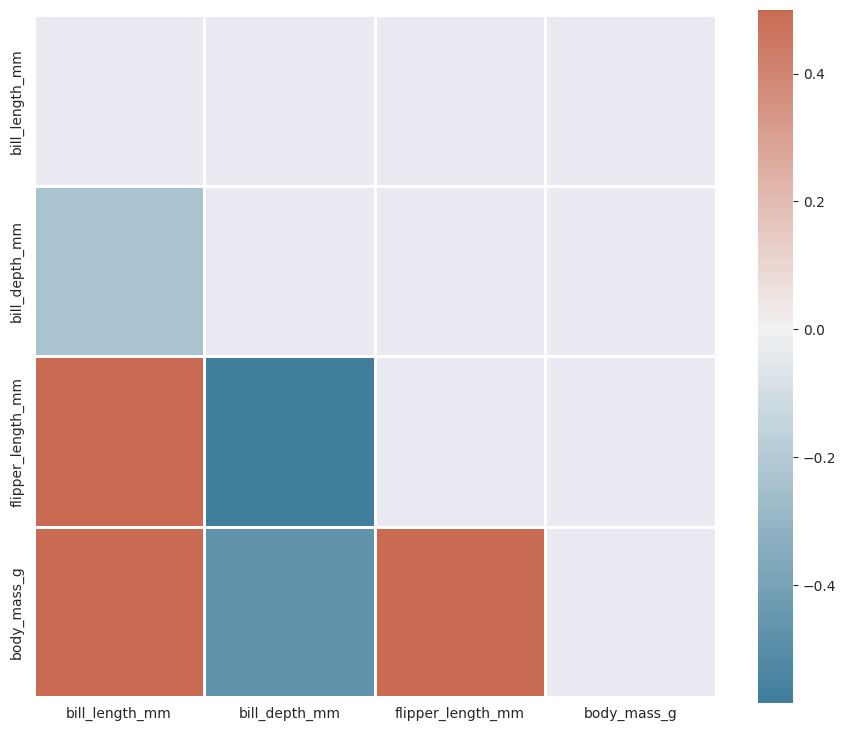

In [90]:
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": 1})

<Axes: xlabel='sex', ylabel='Count'>

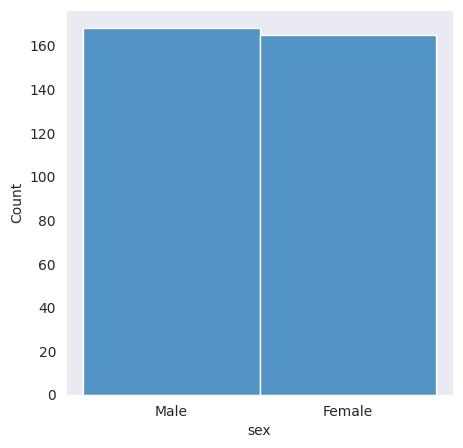

In [93]:
plt.figure(figsize=(5, 5))
sns.histplot(data=pg, x='sex')

In [94]:
pg.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [123]:
"""
Задача 44: В ячейке ниже представлен код генерирующий DataFrame,
которая состоит всего из 1 столбца. Ваша задача перевести его
в one hot вид. Сможете ли вы это сделать без get_dummies?
"""


import random
lst = ['robot'] * 10
lst += ['human'] * 10
random.shuffle(lst)
data = pd.DataFrame({'whoAmI':lst})

In [126]:
# pd.get_dummies(data['whoAmI'])

In [127]:
data["robot"] = np.where(data["whoAmI"]=="robot", 1, 0)
data["human"] = np.where(data["whoAmI"]=="human", 1, 0)
data.drop(["whoAmI"], axis=1, inplace=True)

print(data)

    robot  human
0       0      1
1       0      1
2       1      0
3       1      0
4       0      1
5       1      0
6       0      1
7       0      1
8       1      0
9       1      0
10      0      1
11      1      0
12      1      0
13      0      1
14      0      1
15      1      0
16      0      1
17      1      0
18      1      0
19      0      1
